
Title of ML Project : "Predicting Box Office Success : A Data Driven Analysis of Film Revenue Using Machine Learning"



---



Name : Chrissannah Mecanzie KJ

Organization : Entri Elevate

Date : 20/11/2024





---



Step 1 : Overview of the Problem Statement

The prime motive of this project is to predict the box office revenue of films using machine learning techniques by evaluating historical data, that includes variables such as budget, cast, genre and the release timing. The model helps to understand the pattern and the main factors that might influence a film's financial success. The challenge is in accurately forecasting revenue. This analysis will provide valuable insights for film producers and studios helping them make informed about the marketing strategies to maximize profitability.

Step 2 : Objective

The objective of this project is to develop a machine learning model to accurately predict a film's box office revenue based on key factors such as budget, cast, genre, and release timing.

Step 3 : Data Description

Source -- data.world https://data.world/cye/update-movie-imdb

Features -- [Title,Budget,Genre,Director,Cast,Release date,Runtime,Production Company,Box office gross,IMDb rating,Metascore,Number of Screens,Country of origin,language,Marketing spend,Pre-release social media activity,Awards,Competition,Sequel or Original,Production Time]

Step 4 : Data Collection



---



-- Importing essential python libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import time
import joblib


-- Importing the dataset

In [ ]:
from google.colab import files
upload =files.upload()

Saving movie_metadata (1) - movie_metadata (2).csv to movie_metadata (1) - movie_metadata (2).csv


In [ ]:
df=pd.read_csv('movie_metadata (1) - movie_metadata (2).csv')

-- Insights

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [ ]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [ ]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
df.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


**Step 5 : Data Preprocessing - Data Cleaning**

In [ ]:
df.isnull().sum()

,0
color,19
director_name,104
num_critic_for_reviews,50
duration,15
director_facebook_likes,104
actor_3_facebook_likes,23
actor_2_name,13
actor_1_facebook_likes,7
gross,884
genres,0


In [ ]:
df = df.dropna()
print(df.isnull().sum())

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64


In [ ]:
df.duplicated().sum()

33

In [ ]:
df = df.drop_duplicates()

-- Applying imputation technique for categorical data - Mode

In [ ]:

knn_imputer = KNNImputer(n_neighbors=5)
df[['budget','gross', 'duration','num_critic_for_reviews','title_year','director_facebook_likes','actor_3_facebook_likes','aspect_ratio']] = knn_imputer.fit_transform(df[['budget', 'gross', 'duration','num_critic_for_reviews','title_year','director_facebook_likes','actor_3_facebook_likes','aspect_ratio']])

In [ ]:
df['color'].fillna(df['color'].mode()[0],inplace=True)
df['color'].fillna('Unknown',inplace=True)
df['actor_2_name'].fillna('Unknown',inplace=True)
df['actor_3_name'].fillna('Unknown',inplace=True)
df['actor_1_name'].fillna('Unknown',inplace=True)
df['plot_keywords'].fillna('Unknown',inplace=True)
df['language'].fillna('Unknown',inplace=True)
df['director_name'].fillna('Unknown',inplace=True)
df['country'].fillna('Unknown',inplace=True)
df['genres'].fillna('Unknown',inplace=True)
df['movie_title'].fillna('Unknown',inplace=True)



<ipython-input-13-bbef5fddb945>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['color'].fillna(df['color'].mode()[0],inplace=True)
<ipython-input-13-bbef5fddb945>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [ ]:
df['log_gross'] = np.log1p(df['gross'])
df['log_budget'] = np.log1p(df['budget'])

# Define categorical and numerical features
categorical_features = ['genres', 'content_rating', 'country']
numeric_features = ['duration', 'num_critic_for_reviews', 'log_budget', 'num_user_for_reviews', 'movie_facebook_likes']

# One-hot encode categorical features and scale numeric features
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [ ]:
categorical_train = df.select_dtypes(include=['object']).columns
categorical_train

Index(['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link',
       'language', 'country', 'content_rating'],
      dtype='object')

In [ ]:
df[categorical_train]

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
0,Color,James Cameron,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13
1,Color,Gore Verbinski,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13
2,Color,Sam Mendes,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13
3,Color,Christopher Nolan,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,PG-13
5,Color,Andrew Stanton,Samantha Morton,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,Polly Walker,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,English,USA,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Color,Olivier Assayas,Béatrice Dalle,Drama|Music|Romance,Maggie Cheung,Clean,Don McKellar,jail|junkie|money|motel|singer,http://www.imdb.com/title/tt0388838/?ref_=fn_t...,French,France,R
5027,Color,Jafar Panahi,Nargess Mamizadeh,Drama,Fereshteh Sadre Orafaiy,The Circle,Mojgan Faramarzi,abortion|bus|hospital|prison|prostitution,http://www.imdb.com/title/tt0255094/?ref_=fn_t...,Persian,Iran,Not Rated
5033,Color,Shane Carruth,David Sullivan,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,Casey Gooden,changing the future|independent film|invention...,http://www.imdb.com/title/tt0390384/?ref_=fn_t...,English,USA,PG-13
5035,Color,Robert Rodriguez,Peter Marquardt,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,Consuelo Gómez,assassin|death|guitar|gun|mariachi,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,Spanish,USA,R


In [ ]:
imputer_categorical = SimpleImputer(strategy='most_frequent')
df[categorical_train] = imputer_categorical.fit_transform(df[categorical_train])

df.isnull().sum()

,0
color,0
director_name,0
num_critic_for_reviews,0
duration,0
director_facebook_likes,0
actor_3_facebook_likes,0
actor_2_name,0
actor_1_facebook_likes,0
gross,0
genres,0


-- Applying imputation techniques for numerical data - Median

In [ ]:
numerical = df.select_dtypes(include=['number']).columns
numerical

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'log_gross', 'log_budget'],
      dtype='object')

In [ ]:
imputer_numerical = SimpleImputer(strategy='median')
df[numerical] = imputer_numerical.fit_transform(df[numerical])

df.isnull().sum()

,0
color,0
director_name,0
num_critic_for_reviews,0
duration,0
director_facebook_likes,0
actor_3_facebook_likes,0
actor_2_name,0
actor_1_facebook_likes,0
gross,0
genres,0


In [ ]:
numerical= df.select_dtypes(include=['number']).columns
numerical

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'log_gross', 'log_budget'],
      dtype='object')

-- Checking and handling Outliers

In [ ]:
df[numerical].skew()

,0
num_critic_for_reviews,1.422764
duration,2.406590
director_facebook_likes,4.744413
actor_3_facebook_likes,6.392623
actor_1_facebook_likes,20.364203
gross,2.971484
num_voted_users,3.656562
cast_total_facebook_likes,13.007479
facenumber_in_poster,4.964169
num_user_for_reviews,3.866406


In [ ]:
df[numerical]

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,log_gross,log_budget
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204.0,4834.0,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000.0,20.449494,19.283571
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220.0,48350.0,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0.0,19.550159,19.519293
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868.0,11700.0,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000.0,19.114199,19.316769
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337.0,106759.0,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,19.920595,19.336971
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204.0,1873.0,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000.0,18.106774,19.390323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,81.0,110.0,107.0,45.0,576.0,136007.0,3924.0,776.0,1.0,39.0,4500.0,2004.0,133.0,6.9,2.35,171.0,11.820469,8.412055
5027,64.0,90.0,397.0,0.0,5.0,673780.0,4555.0,5.0,0.0,26.0,10000.0,2000.0,0.0,7.5,1.85,697.0,13.420660,9.210440
5033,143.0,77.0,291.0,8.0,291.0,424760.0,72639.0,368.0,0.0,371.0,7000.0,2004.0,45.0,7.0,1.85,19000.0,12.959282,8.853808
5035,56.0,81.0,0.0,6.0,121.0,2040920.0,52055.0,147.0,0.0,130.0,7000.0,1992.0,20.0,6.9,1.37,0.0,14.528912,8.853808


-- Identifying Outliers with IQR Method

In [ ]:
Q1 = df[numerical].quantile(0.25)
Q3 = df[numerical].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (df[numerical] < lower_bound) | (df[numerical] > upper_bound)

df_cleaned = df[~outliers.any(axis=1)]

(df_cleaned)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,log_gross,log_budget
157,Color,Dean Parisot,135.0,90.0,23.0,233.0,Richard Burgi,957.0,110332737.0,Comedy|Crime,...,USA,PG-13,100000000.0,2005.0,550.0,6.1,2.35,2000.0,18.519011,18.420681
192,Color,Phillip Noyce,330.0,101.0,176.0,282.0,Andre Braugher,11000.0,118311368.0,Action|Crime|Mystery|Thriller,...,USA,PG-13,110000000.0,2010.0,702.0,6.4,2.35,23000.0,18.588830,18.515991
209,Color,Carlos Saldanha,159.0,101.0,107.0,56.0,Rachel Crow,688.0,131536019.0,Adventure|Animation|Comedy|Family|Musical,...,USA,G,103000000.0,2014.0,237.0,6.4,2.35,0.0,18.694791,18.450240
215,Color,John McTiernan,85.0,102.0,323.0,241.0,Vladimir Kulich,845.0,32694788.0,Action|Adventure|History,...,USA,R,85000000.0,1999.0,372.0,6.6,2.35,0.0,17.302726,18.258162
224,Color,Mark Steven Johnson,276.0,123.0,160.0,402.0,Matt Long,12000.0,115802596.0,Action|Fantasy|Thriller,...,USA,PG-13,110000000.0,2007.0,701.0,5.2,2.35,0.0,18.567398,18.515991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4816,Color,Henry Alex Rubin,110.0,88.0,30.0,0.0,Joe Bishop,15.0,1523883.0,Documentary|Sport,...,USA,R,1750211.0,2005.0,0.0,7.8,1.85,0.0,14.236773,14.375247
4828,Color,Gregory Widen,56.0,98.0,10.0,912.0,Adam Goldberg,10000.0,16115878.0,Action|Fantasy|Horror|Mystery|Thriller,...,USA,R,8000000.0,1995.0,1000.0,6.6,2.35,0.0,16.595316,15.894952
4842,Color,Julie Taymor,156.0,133.0,278.0,107.0,T.V. Carpio,5000.0,24343673.0,Drama|Fantasy|Musical|Romance,...,USA,PG-13,45000000.0,2007.0,117.0,7.4,2.35,14000.0,17.007783,17.622173
4971,Color,Dennis Iliadis,241.0,114.0,29.0,616.0,Monica Potter,956.0,32721635.0,Crime|Horror|Thriller,...,USA,R,15000000.0,2009.0,878.0,6.6,1.85,0.0,17.303547,16.523561


-- Rechecking skeweness

In [ ]:
df_cleaned[numerical].skew()

,0
num_critic_for_reviews,0.907863
duration,0.561865
director_facebook_likes,1.726847
actor_3_facebook_likes,0.341240
actor_1_facebook_likes,1.716801
gross,1.339410
num_voted_users,1.769571
cast_total_facebook_likes,1.562397
facenumber_in_poster,1.176116
num_user_for_reviews,1.426651


Step 6 : Exploratory Data Analysis

-- Bar Plot : Compare counts of different categories

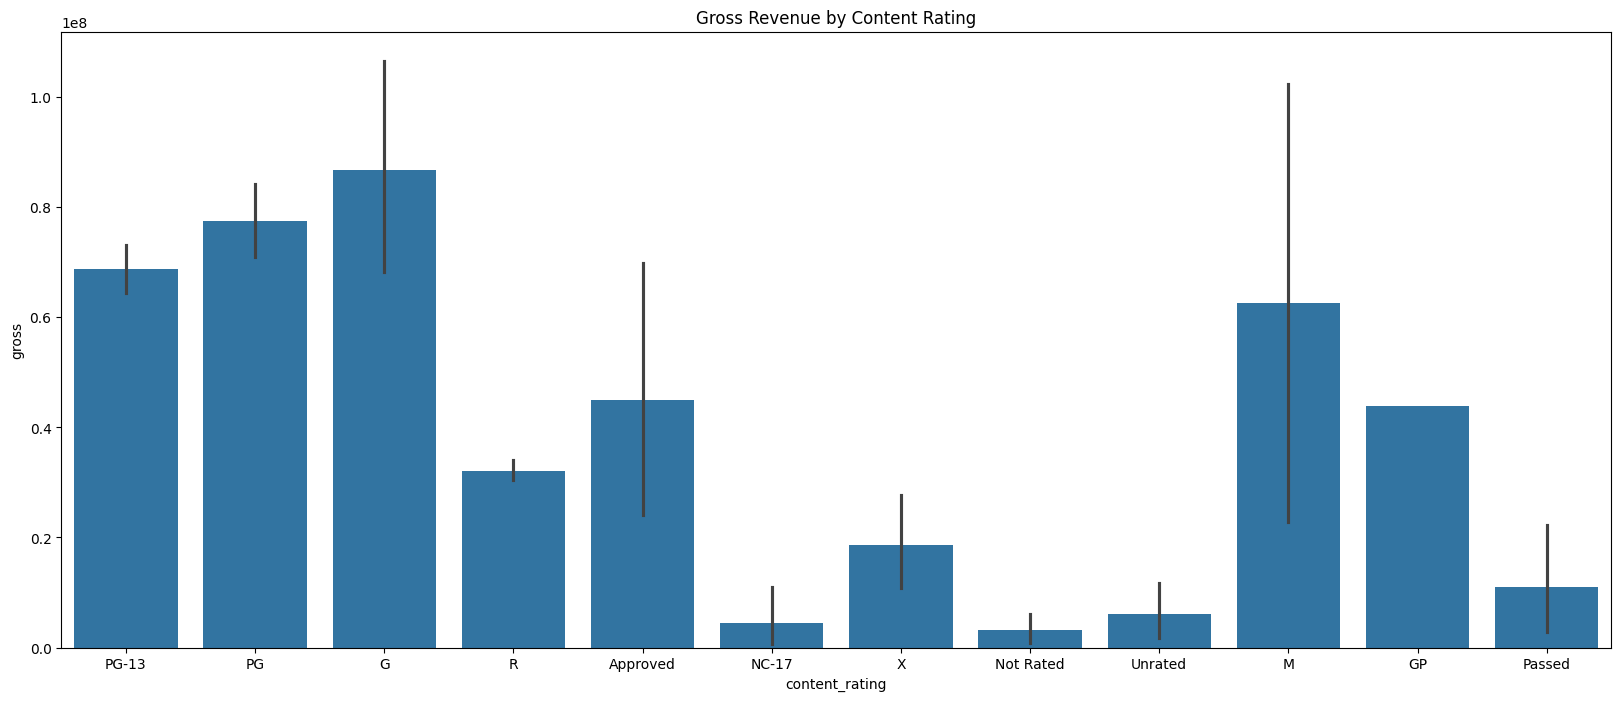

In [ ]:
plt.figure(figsize=(20, 8))
sns.barplot(x='content_rating', y='gross', data=df)
plt.title('Gross Revenue by Content Rating')
plt.show()

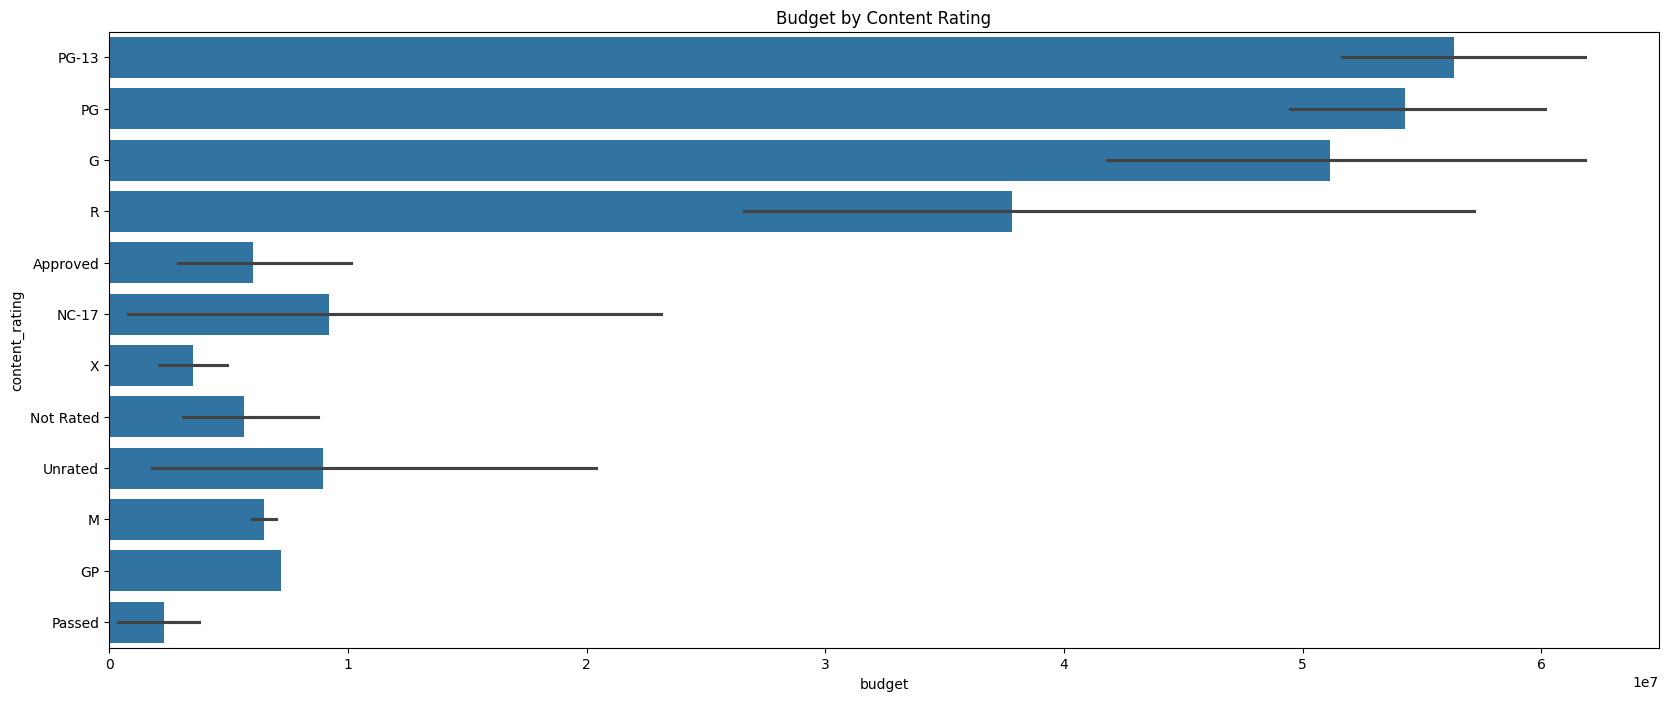

In [ ]:
plt.figure(figsize=(20, 8))
sns.barplot(x='budget', y='content_rating', data=df)
plt.title('Budget by Content Rating')
plt.show()

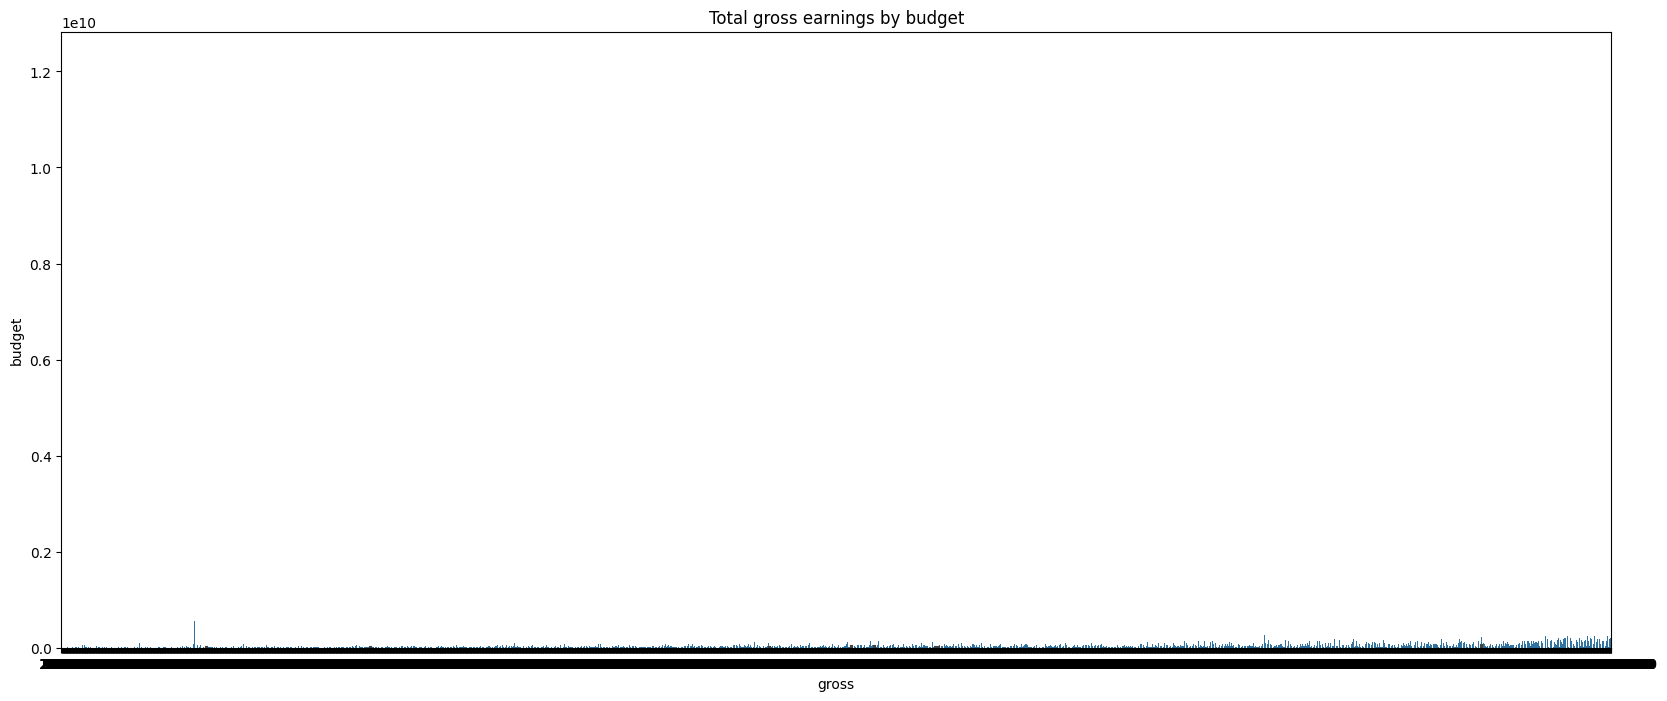

In [ ]:
plt.figure(figsize=(20, 8))
sns.barplot(x='gross', y='budget', data=df)
plt.title('Total gross earnings by budget')
plt.show()

-- Line plot : Visualize trends over time

<Axes: title={'center': 'Gross Revenue by Year'}, xlabel='title_year'>

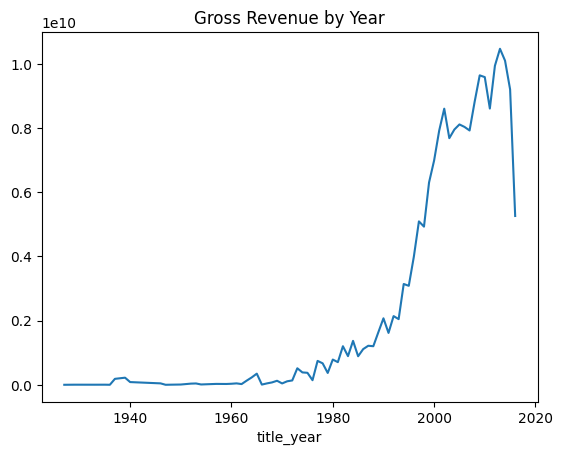

In [ ]:
df.groupby('title_year')['gross'].sum().plot(kind='line', title='Gross Revenue by Year')

Step 7 : Feature Engineering

In [ ]:
df_cleaned[categorical_train]

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
157,Color,Dean Parisot,Richard Burgi,Comedy|Crime,John Michael Higgins,Fun with Dick and Jane,David Herman,animal abuse|ceo|heist|suburb|unemployment,http://www.imdb.com/title/tt0369441/?ref_=fn_t...,English,USA,PG-13
192,Color,Phillip Noyce,Andre Braugher,Action|Crime|Mystery|Thriller,Angelina Jolie Pitt,Salt,August Diehl,cia|on the run|russian|russian spy|strong fema...,http://www.imdb.com/title/tt0944835/?ref_=fn_t...,English,USA,PG-13
209,Color,Carlos Saldanha,Rachel Crow,Adventure|Animation|Comedy|Family|Musical,Miguel Ferrer,Rio 2,Jeffrey Garcia,amazon|bird|father in law|jungle|no opening cr...,http://www.imdb.com/title/tt2357291/?ref_=fn_t...,English,USA,G
215,Color,John McTiernan,Vladimir Kulich,Action|Adventure|History,Tony Curran,The 13th Warrior,Clive Russell,arab|battle|combat|viking|warrior,http://www.imdb.com/title/tt0120657/?ref_=fn_t...,English,USA,R
224,Color,Mark Steven Johnson,Matt Long,Action|Fantasy|Thriller,Nicolas Cage,Ghost Rider,Peter Fonda,blackheart|devil|father|ghost|mephistopheles,http://www.imdb.com/title/tt0259324/?ref_=fn_t...,English,USA,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...
4816,Color,Henry Alex Rubin,Joe Bishop,Documentary|Sport,Mark Zupan,Murderball,Andy Cohn,paralympics|quad rugby|rugby|team|wheelchair,http://www.imdb.com/title/tt0436613/?ref_=fn_t...,English,USA,R
4828,Color,Gregory Widen,Adam Goldberg,Action|Fantasy|Horror|Mystery|Thriller,Viggo Mortensen,The Prophecy,Virginia Madsen,angel|corpse|girl|heaven|soul,http://www.imdb.com/title/tt0114194/?ref_=fn_t...,English,USA,R
4842,Color,Julie Taymor,T.V. Carpio,Drama|Fantasy|Musical|Romance,Jim Sturgess,Across the Universe,Robert Clohessy,anti war|liverpool|love|protest|song,http://www.imdb.com/title/tt0445922/?ref_=fn_t...,English,USA,PG-13
4971,Color,Dennis Iliadis,Monica Potter,Crime|Horror|Thriller,Tony Goldwyn,The Last House on the Left,Martha MacIsaac,kidnapping|lake|microwave oven|psychopath|woods,http://www.imdb.com/title/tt0844708/?ref_=fn_t...,English,USA,R


-- One-Hot Encoding

In [ ]:
X = df.drop(columns=['gross'])
categorical_cols = X.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
print(X_encoded.head())

Categorical columns: Index(['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link',
       'language', 'country', 'content_rating'],
      dtype='object')
   num_critic_for_reviews  duration  director_facebook_likes  \
0                   723.0     178.0                      0.0   
1                   302.0     169.0                    563.0   
2                   602.0     148.0                      0.0   
3                   813.0     164.0                  22000.0   
5                   462.0     132.0                    475.0   

   actor_3_facebook_likes  actor_1_facebook_likes  num_voted_users  \
0                   855.0                  1000.0         886204.0   
1                  1000.0                 40000.0         471220.0   
2                   161.0                 11000.0         275868.0   
3                 23000.0                 27000.0        1144337.0   
5                   530.

In [ ]:
categorical_cols

Index(['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link',
       'language', 'country', 'content_rating'],
      dtype='object')

In [ ]:
df_cleaned

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,log_gross,log_budget
157,Color,Dean Parisot,135.0,90.0,23.0,233.0,Richard Burgi,957.0,110332737.0,Comedy|Crime,...,USA,PG-13,100000000.0,2005.0,550.0,6.1,2.35,2000.0,18.519011,18.420681
192,Color,Phillip Noyce,330.0,101.0,176.0,282.0,Andre Braugher,11000.0,118311368.0,Action|Crime|Mystery|Thriller,...,USA,PG-13,110000000.0,2010.0,702.0,6.4,2.35,23000.0,18.588830,18.515991
209,Color,Carlos Saldanha,159.0,101.0,107.0,56.0,Rachel Crow,688.0,131536019.0,Adventure|Animation|Comedy|Family|Musical,...,USA,G,103000000.0,2014.0,237.0,6.4,2.35,0.0,18.694791,18.450240
215,Color,John McTiernan,85.0,102.0,323.0,241.0,Vladimir Kulich,845.0,32694788.0,Action|Adventure|History,...,USA,R,85000000.0,1999.0,372.0,6.6,2.35,0.0,17.302726,18.258162
224,Color,Mark Steven Johnson,276.0,123.0,160.0,402.0,Matt Long,12000.0,115802596.0,Action|Fantasy|Thriller,...,USA,PG-13,110000000.0,2007.0,701.0,5.2,2.35,0.0,18.567398,18.515991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4816,Color,Henry Alex Rubin,110.0,88.0,30.0,0.0,Joe Bishop,15.0,1523883.0,Documentary|Sport,...,USA,R,1750211.0,2005.0,0.0,7.8,1.85,0.0,14.236773,14.375247
4828,Color,Gregory Widen,56.0,98.0,10.0,912.0,Adam Goldberg,10000.0,16115878.0,Action|Fantasy|Horror|Mystery|Thriller,...,USA,R,8000000.0,1995.0,1000.0,6.6,2.35,0.0,16.595316,15.894952
4842,Color,Julie Taymor,156.0,133.0,278.0,107.0,T.V. Carpio,5000.0,24343673.0,Drama|Fantasy|Musical|Romance,...,USA,PG-13,45000000.0,2007.0,117.0,7.4,2.35,14000.0,17.007783,17.622173
4971,Color,Dennis Iliadis,241.0,114.0,29.0,616.0,Monica Potter,956.0,32721635.0,Crime|Horror|Thriller,...,USA,R,15000000.0,2009.0,878.0,6.6,1.85,0.0,17.303547,16.523561


-- Step 8 : Feature Selection


In [ ]:
features = df[['director_name', 'actor_1_name', 'budget',
                'num_critic_for_reviews', 'gross',
                'movie_facebook_likes', 'genres',
                'imdb_score','cast_total_facebook_likes','content_rating']].copy()

target = df['gross']

In [ ]:
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [ ]:
X= df.drop(columns=['gross'])
categorical_cols = X.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
print(X_encoded.head())

Categorical columns: Index(['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link',
       'language', 'country', 'content_rating'],
      dtype='object')
   num_critic_for_reviews  duration  director_facebook_likes  \
0                   723.0     178.0                      0.0   
1                   302.0     169.0                    563.0   
2                   602.0     148.0                      0.0   
3                   813.0     164.0                  22000.0   
5                   462.0     132.0                    475.0   

   actor_3_facebook_likes  actor_1_facebook_likes  num_voted_users  \
0                   855.0                  1000.0         886204.0   
1                  1000.0                 40000.0         471220.0   
2                   161.0                 11000.0         275868.0   
3                 23000.0                 27000.0        1144337.0   
5                   530.

Step 9 : Splitting data into training and testing sets

In [ ]:
X = df.drop(columns=['gross'])
y = df['gross']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

Training set shape: X_train: (2977, 29), y_train: (2977,)
Testing set shape: X_test: (745, 29), y_test: (745,)


Step 10 : Feature Scaling

In [ ]:
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

In [ ]:
X = df.drop(columns=['gross'])
y = df['gross']

In [ ]:
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train_min_max = min_max_scaler.fit_transform(X)
X_test_min_max = min_max_scaler.transform(X_test)

In [ ]:
X_train_standardized = standard_scaler.fit_transform(X_train)
X_test_standardized = standard_scaler.transform(X_test)

In [ ]:
print("Min-Max Scaled Training Features:", X_train_min_max.shape)
print("Min-Max Scaled Testing Features:", X_test_min_max.shape)
print("Standardized Training Features:", X_train_standardized.shape)
print("Standardized Testing Features:", X_test_standardized.shape)

Min-Max Scaled Training Features: (3722, 19664)
Min-Max Scaled Testing Features: (745, 19664)
Standardized Training Features: (2977, 19664)
Standardized Testing Features: (745, 19664)


Step 11 : Build the ML models and Step 12 : Model Evaluation


In [ ]:

models = {
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression(),
    'MLP Regressor': MLPRegressor(max_iter=1000, random_state=42),
    'AdaBoost Regressor': AdaBoostRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    # Store results in a dictionary
    metrics = {
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2
    }
    results.append(metrics)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Sort the DataFrame by R2 Score in descending order
results_df_sorted = results_df.sort_values(by='R2 Score', ascending=False)

# Print the sorted DataFrame
print(results_df_sorted)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

                         Model           MAE           MSE          RMSE  \
4  Gradient Boosting Regressor  5.629423e+05  1.657417e+13  4.071139e+06   
0      Random Forest Regressor  3.851475e+05  2.937637e+13  5.419997e+06   
3           AdaBoost Regressor  6.057322e+06  6.599113e+13  8.123492e+06   
1            Linear Regression  3.065869e+07  2.382072e+15  4.880647e+07   
2                MLP Regressor  3.586682e+07  4.209175e+15  6.487816e+07   

   R2 Score  
4  0.997199  
0  0.995036  
3  0.988849  
1  0.597488  
2  0.288752  


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Step 12 : Hyperparameter Tuning

In [ ]:
model = RandomForestRegressor(random_state=42)
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=10, scoring='neg_mean_squared_error',
                                   cv=3, verbose=2, n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_model = random_search.best_estimator_


y_pred = best_model.predict(X_test)
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}
R² Score: 0.99


-- Training and testing accuracy

In [ ]:
results = []
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)  # R² on training data
    test_r2 = r2_score(y_test, y_test_pred)    # R² on testing data

    metrics = {
        'Model': name,
        'Train R²': train_r2,
        'Test R²': test_r2
    }
    results.append(metrics)

results_df = pd.DataFrame(results)
print(results_df)


                         Model  Train R²   Test R²
0      Random Forest Regressor  0.999692  0.995036
1            Linear Regression  1.000000  0.597488
2                MLP Regressor  0.275088  0.288752
3           AdaBoost Regressor  0.990499  0.988849
4  Gradient Boosting Regressor  0.999950  0.997199


Step 14 : Save the model

In [ ]:
joblib.dump(best_model, 'gradient_boosting_model.pkl')
print("Model saved successfully.")

Model saved successfully.


Step 15 : Test with Unseen Data

In [52]:
from google.colab import files
upload =files.upload()

Saving insurance.csv to insurance.csv


In [53]:
unseen_df=pd.read_csv('insurance.csv')

In [54]:
unseen_df.fillna(unseen_df.median(numeric_only=True), inplace=True)

categorical_cols = unseen_df.select_dtypes(include=['object']).columns
unseen_df_encoded = pd.get_dummies(unseen_df, columns=categorical_cols, drop_first=True)

model = joblib.load('gradient_boosting_model.pkl')

trained_model_columns = model.feature_names_in_

for col in trained_model_columns:
    if col not in unseen_df_encoded.columns:
        unseen_df_encoded[col] = 0

unseen_df_encoded = unseen_df_encoded[trained_model_columns]

predictions = model.predict(unseen_df_encoded)

print(predictions)

Streaming output truncated to the last 5000 lines.
<ipython-input-54-34ece496b907>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  unseen_df_encoded[col] = 0
<ipython-input-54-34ece496b907>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  unseen_df_encoded[col] = 0
<ipython-input-54-34ece496b907>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-

[2145.38591667 2145.38591667 2145.38591667 ... 2145.38591667 2145.38591667
 2145.38591667]


Step 16 :Interpretation of Results (Conclusion)

-- Model Performance
The Gradient Boosting Regressor achieves near-perfect R² scores by sequentially improving predictions while preventing overfitting through regularization. and its ideal for accurate movie gross revenue predictions.

--Challenges Faced

Computational Time - Hyperparameter tuning took a considerable amount of time due to the size of the dataset and high dimentionality after encoding.

--Conclusion

In this project, multiple machine learning models were implemented to predict the gross revenue of films using various features from the dataset. After evaluating different models, Random Forest Regressordemonstrated the best performance.Despite these difficulties, the results indicate that with further data refinement and model tuning, accurate predictions of movie gross revenue can be achieved.